In [1]:
import os
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
path_to_phishing_dataset = os.getenv("PATH_TO_PHISHING_DATASET")

if not os.path.isdir(path_to_phishing_dataset):
    print('not a file')

In [4]:
os.listdir(path_to_phishing_dataset)

['Testing.parquet', 'Training.parquet']

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [6]:
train =  pd.read_parquet(os.path.join(path_to_phishing_dataset,'Training.parquet'))
test = pd.read_parquet(os.path.join(path_to_phishing_dataset,'Testing.parquet'))

In [7]:
type(test)

pandas.core.frame.DataFrame

In [8]:
train.head(n=3)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,https://www.todayshomeowner.com/how-to-make-ho...,82,23,0,2,7,0,0,0,0,...,1,1,0,240,8892,67860,0,1,4,legitimate
1,http://thapthan.ac.th/information/confirmation...,93,14,1,2,0,0,0,0,0,...,1,0,1,0,2996,4189860,0,1,2,phishing
2,http://app.dialoginsight.com/T/OFC4/L2S/3888/B...,121,21,1,3,0,0,0,0,0,...,1,1,0,30,2527,346022,0,1,3,phishing


In [9]:
train.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [10]:
train.shape, test.shape

((7658, 89), (3772, 89))

In [11]:
drop_columns = ['url']
for i in range(89):
    if len(train[train.columns[i]].value_counts()) == 1:
        # print(f'{train[train.columns[i]]} - {train[train.columns[i]].value_counts()}')
        drop_columns.append(train.columns[i])

In [12]:
drop_columns

['url',
 'nb_or',
 'ratio_nullHyperlinks',
 'ratio_intRedirection',
 'ratio_intErrors',
 'submit_email',
 'sfh']

In [13]:
train.drop(columns=drop_columns, inplace=True)
train.shape

(7658, 82)

In [14]:
test.drop(columns=drop_columns, inplace=True)
test.shape

(3772, 82)

In [15]:
train.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent',
       'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn',
       'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash',
       'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host',
       'punycode', 'port', 'tld_in_path', 'tld_in_subdomain',
       'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain',
       'shortening_service', 'path_extension', 'nb_redirection',
       'nb_external_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'longest_word_path',
       'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 'nb_hyperlinks',
      

In [16]:
train['status'].isnull().sum()

0

In [17]:
print(train['status'].value_counts())

status
legitimate    3829
phishing      3829
Name: count, dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
X_train = train.drop(columns=['status'])
y_train = train['status']
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [20]:
X_train.head(n=2), X_train.shape

(   length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
 0          82               23   0        2           7      0      0       0   
 1          93               14   1        2           0      0      0       0   
 
    nb_eq  nb_underscore  ...  empty_title  domain_in_title  \
 0      0              0  ...            0                1   
 1      0              0  ...            0                1   
 
    domain_with_copyright  whois_registered_domain  domain_registration_length  \
 0                      1                        0                         240   
 1                      0                        1                           0   
 
    domain_age  web_traffic  dns_record  google_index  page_rank  
 0        8892        67860           0             1          4  
 1        2996      4189860           0             1          2  
 
 [2 rows x 81 columns],
 (7658, 81))

In [36]:
X_train.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent',
       'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn',
       'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash',
       'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host',
       'punycode', 'port', 'tld_in_path', 'tld_in_subdomain',
       'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain',
       'shortening_service', 'path_extension', 'nb_redirection',
       'nb_external_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'longest_word_path',
       'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 'nb_hyperlinks',
      

In [21]:
y_train.shape

(7658,)

In [22]:
X_test = test.drop(columns=['status'])
y_test = test['status']
y_test = le.fit_transform(y_test)

In [23]:
X_test.shape, y_test.shape

((3772, 81), (3772,))

In [24]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

2025-05-23 19:00:36.345820: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
model = Sequential()

model.add(Input(shape=(81,)))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,121 (16.10 KB)

 Trainable params: 4,121 (16.10 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [28]:
history = model.fit(X_train,y_train,epochs=120,validation_split=0.2,batch_size=40)

Epoch 1/120
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6064 - loss: 1175.0959 - val_accuracy: 0.5685 - val_loss: 1322.1005
Epoch 2/120
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6793 - loss: 1070.9937 - val_accuracy: 0.5986 - val_loss: 2033.3875
Epoch 3/120
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6575 - loss: 1824.6393 - val_accuracy: 0.6697 - val_loss: 1716.4371
Epoch 4/120
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7343 - loss: 640.4857 - val_accuracy: 0.7885 - val_loss: 752.7838
Epoch 5/120
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7393 - loss: 494.4616 - val_accuracy: 0.7337 - val_loss: 898.5547
Epoch 6/120
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7516 - loss: 378.8027 - val_accuracy: 0.7820 - val_loss: 162.3286
Epoch 7/120
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7336 - loss: 451.2799 - val_accuracy: 0.7604 - val_loss: 1404.7451
Epoch 8/120
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

In [29]:
y_pred = model.predict(X_test)

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [30]:
y_pred = np.where(y_pred>0.5,1,0)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

0.8319194061505832

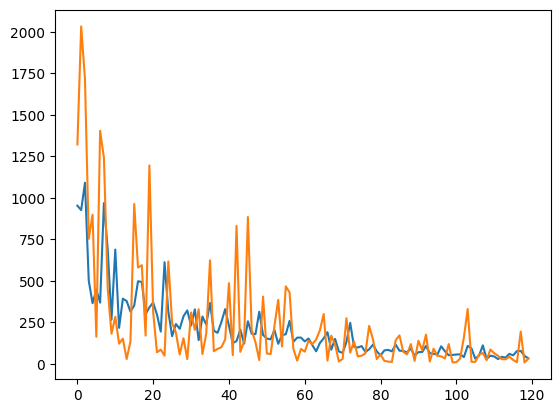

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

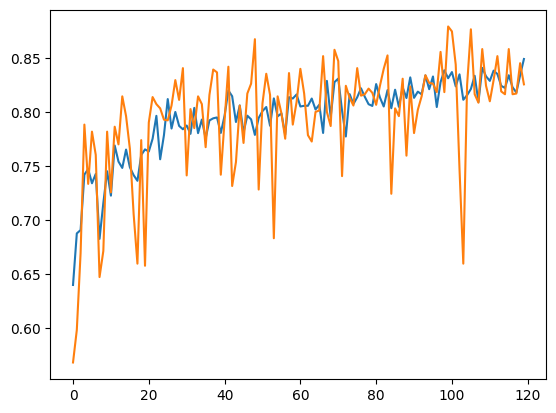

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [35]:
test_url = 'https:www.google.com'

prediction = model.predict(test_url)

ValueError: Unrecognized data type: x=https:www.google.com (of type <class 'str'>)